In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [7]:
plt.style.use('ggplot')

In [8]:
data = pd.read_csv("online_shoppers_intention.csv")

In [9]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
# Let us see that what variables are a sinificant predictors for the Revenue target variable.

In [11]:
number = LabelEncoder()
data["Revenue"] = number.fit_transform(data["Revenue"].astype("str"))
data["VisitorType"] = number.fit_transform(data["VisitorType"].astype("str"))
data["Weekend"] = number.fit_transform(data["Weekend"].astype("str"))
data["Month"] = number.fit_transform(data["Month"].astype("str"))
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [17]:
X = data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']]

y = data["Revenue"]

import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.306931
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12313
Method:                           MLE   Df Model:                           16
Date:                Sun, 26 Apr 2020   Pseudo R-squ.:                  0.2876
Time:                        00:04:56   Log-Likelihood:                -3784.5
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Administrative             -0.0168      0.011     -1.532      0.126      -0.038   

In [18]:
np.exp(result.params)

Administrative             9.833115e-01
Administrative_Duration    9.997153e-01
Informational              1.022480e+00
Informational_Duration     1.000092e+00
ProductRelated             1.002690e+00
ProductRelated_Duration    1.000070e+00
BounceRates                4.240894e+02
ExitRates                  3.434769e-12
PageValues                 1.080390e+00
SpecialDay                 3.851979e-01
Month                      1.007706e+00
OperatingSystems           6.889726e-01
Browser                    9.722173e-01
Region                     9.336027e-01
TrafficType                9.919014e-01
VisitorType                6.749090e-01
Weekend                    9.710589e-01
dtype: float64

In [33]:
# From the above obervation, there are many variables with P value greater than 0.05. 
# We can try and standardize the data

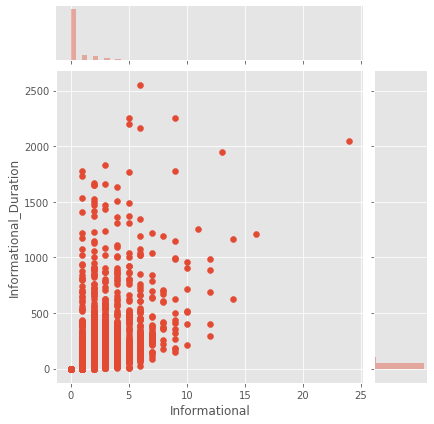

In [34]:
sns.jointplot("Informational", "Informational_Duration", data = data)

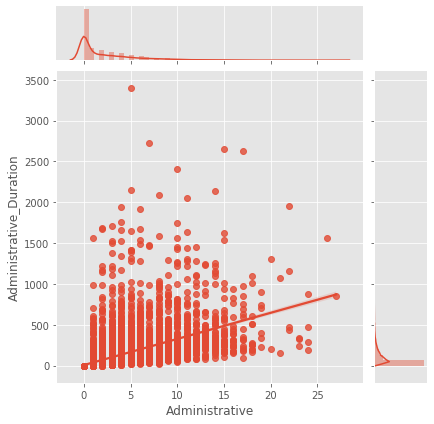

In [35]:
sns.jointplot("Administrative", "Administrative_Duration", data = data, kind = "reg")

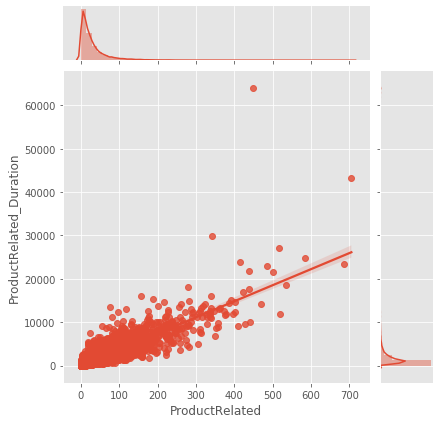

In [36]:
sns.jointplot("ProductRelated", "ProductRelated_Duration", data = data, kind = "reg")

In [37]:
# From above graphs, the last graph shows a strong linear relationship which might not be surprising.

In [38]:
np.mean(data[data["Revenue"] == 1]["Informational"])

0.7861635220125787

In [39]:
np.mean(data[data["Revenue"] == 1]["ProductRelated"])

48.2101677148847

In [40]:
np.mean(data[data["Revenue"] == 1]["Administrative"])

3.393605870020964

In [41]:
# From above, we see that ProductRelated pages yield revenue most of the times which is not surprising.

Text(0.5, 1.0, 'Product Related pages vs Revenue')

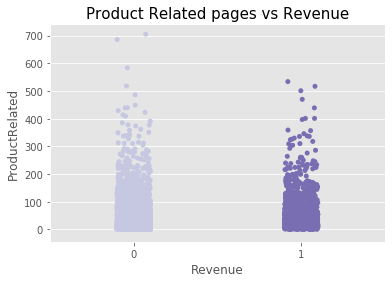

In [42]:
sns.stripplot(x = data['Revenue'], y = data['ProductRelated'], palette = 'Purples')
plt.title('Product Related pages vs Revenue', fontsize = 15)

Text(0.5, 1.0, 'Administrative pages vs Revenue')

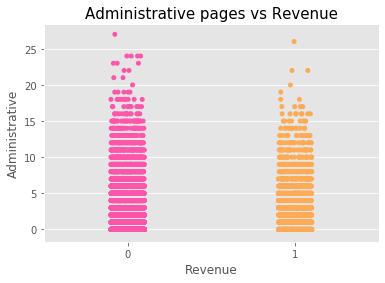

In [46]:
sns.stripplot(x = data['Revenue'], y = data['Administrative'], palette = 'spring')
plt.title('Administrative pages vs Revenue', fontsize = 15)

Text(0.5, 1.0, 'Informational pages vs Revenue')

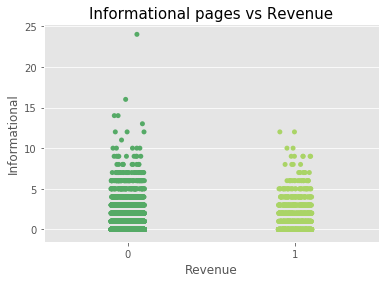

In [48]:
sns.stripplot(x = data['Revenue'], y = data['Informational'], palette = 'summer')
plt.title('Informational pages vs Revenue', fontsize = 15)

In [83]:
np.mean(data[(data["Revenue"] == 1) & (data["Administrative"] != 0)]["PageValues"])

24.82695157342753

In [84]:
np.mean(data[(data["Revenue"] == 1) & (data["Informational"] != 0)]["PageValues"])

19.99449715334747

In [85]:
np.mean(data[(data["Revenue"] == 1) & (data["ProductRelated"] != 0)]["PageValues"])

27.35052613852785

In [ ]:
# Since in our data, Page Values are averages over all the pages, we couldn't get much information. 
# But still, the Page Values having Product Related tend to average out more. However, this is not very significant.